# <font color = 'red'>Deep Learning - TEST</font>
<br>

# 학습자명 : 
# 직무 : 

# 사전 학습된 CNN(ResNet)을 이용한 "Wafer Image" Fine Tunig
## ResNet Model
* ILSVRC-2015 우승
* Residual Network(Skip Connection)
* 152 Layers

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow & Keras

* TensorFlow Version 지정

In [2]:
# %tensorflow_version 1.x
import tensorflow as tf

tf.__version__

'2.6.0'

* GPU 설정 확인

In [3]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Fri Oct  1 04:42:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    73W / 149W |    121MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

* Keras Version 확인

In [4]:
import keras

keras.__version__

'2.6.0'

# I. Google Drive Mount
* 'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


> ## 1) 구글 드라이브 마운트 결과 확인

In [6]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/waferImages.zip'

-rw------- 1 root root 1141460846 Sep 15 01:08 '/content/drive/My Drive/Colab Notebooks/datasets/waferImages.zip'


> ## 2) unzip 'waferImages.zip'

* 약2분

In [7]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/waferImages.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: waferimages/waferimages/training/none/753521.png  
  inflating: waferimages/waferimages/training/none/753522.png  
  inflating: waferimages/waferimages/training/none/753523.png  
  inflating: waferimages/waferimages/training/none/753524.png  
  inflating: waferimages/waferimages/training/none/753525.png  
  inflating: waferimages/waferimages/training/none/753526.png  
  inflating: waferimages/waferimages/training/none/753527.png  
  inflating: waferimages/waferimages/training/none/753528.png  
  inflating: waferimages/waferimages/training/none/753529.png  
  inflating: waferimages/waferimages/training/none/753530.png  
  inflating: waferimages/waferimages/training/none/753531.png  
  inflating: waferimages/waferimages/training/none/753532.png  
  inflating: waferimages/waferimages/training/none/753533.png  
  inflating: waferimages/waferimages/training/none/753534.png  
  inflating: waferimages/waferimages/training/none/753535.png  
  in

In [17]:
!ls -l waferimages/waferimages

total 12
-rw-r--r--  1 root root  645 Jul  5  2020 Script_To_Generate_Images.py
drwxr-xr-x 11 root root 4096 Oct  1 04:43 testing
drwxr-xr-x 11 root root 4096 Oct  1 04:44 training


> ## 3) Wafer Images

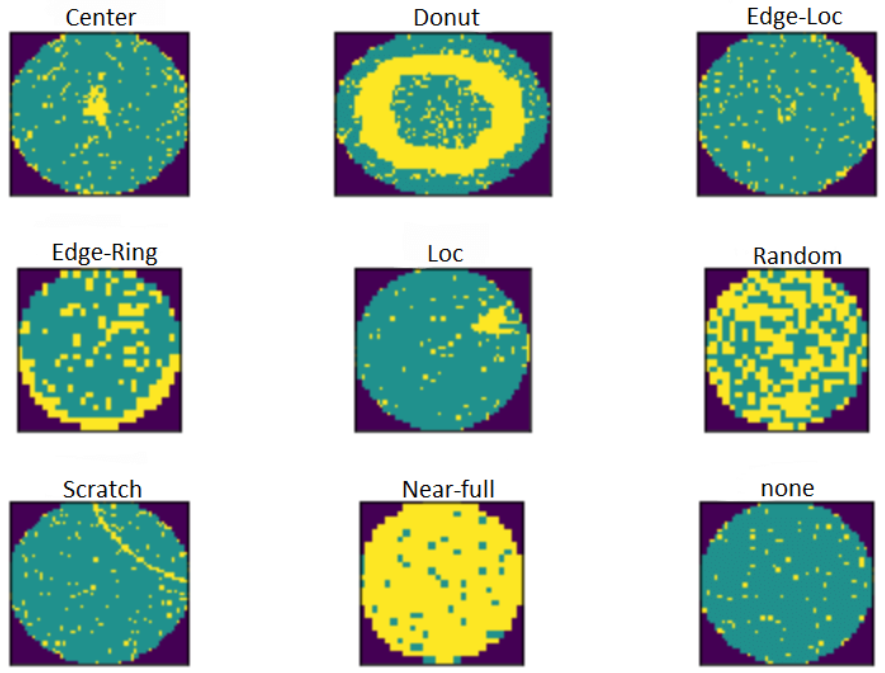

# II. Image_File Directory Setting

* train_dir
* test_dir

# <font color = 'red'>1번 - 10점</font>
## <font color = 'blue'>압축해제된 Wafer 이미지 경로 설정을 완성하세요.</font>

In [19]:
train_dir = 'waferimages/waferimages/training'    # 1번-1
test_dir = 'waferimages/waferimages/testing'     # 1번-2

# III. Data Preprocessing

> ## 1) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

# <font color = 'red'>2번 - 10점</font>
## <font color = 'blue'>다중분류 'class_mode' 및 'target_size'를 300*300으로 지정하세요.</font>



In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (300, 300),      # 2번-1
                  batch_size = 20,
                  class_mode = 'categorical')         # 2번-2

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (300, 300),       # 2번-3
                 batch_size = 20,
                 class_mode = 'categorical')          # 2번-4

Found 54374 images belonging to 9 classes.
Found 118595 images belonging to 9 classes.


# IV. Import ResNet Model & Some Layers Freezing

> ## 1) conv_base

# <font color = 'red'>3번 - 10점</font>
## <font color = 'blue'>ResNet50의 'input_shape'를 알맞게 지정하여 conv_base로 지정하세요.</font>

In [22]:
from tensorflow.keras.applications import ResNet50

conv_base = ResNet50(weights = 'imagenet',
                     include_top = False,
                     input_shape = (300, 300, 3))      # 3번

94781440/94765736 [==============================] - 1s 0us/step


> ## 2) Model Information

In [23]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

> ## 3) 'block5_conv1' Freezing

* Before 'weight' Freezing

In [24]:
print('conv_base 동결 전 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 전 훈련 가능 가중치의 종류: 212


* 'weight' Freezing

# <font color = 'red'>4번 - 10점</font>
## <font color = 'blue'>Fine Tunig을 적용할 'conv5_block1_1_conv' Layer에 대한 동결을 설정하세요.</font>

In [25]:
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'conv5_block1_1_conv':            # 4번
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

* After 'weight' Freezing

In [26]:
print('conv_base 동결 후 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 후 훈련 가능 가중치의 종류: 40


In [27]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

# V. Keras CNN Modeling with ResNet Freezed Layers

> ## 1) Model Define

* 'conv_base' & 'Classification' Network
* Dropout Layer

# <font color = 'red'>5번 - 10점 </font>
##<font color = 'blue'>Dense Layer의 'acvivation' 및 마지막 Layer의 'Unit(Node)' 개수를 지정하세요.</font>

In [28]:
from keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))         # 5번-1
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation = 'relu'))         # 5번-2
model.add(layers.Dropout(0.4))
model.add(layers.Dense(9, activation = 'softmax'))            # 5번-3, 5번-4

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 10, 10, 2048)      23587712  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               104858112 
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 2

> ## 2) Model Compile

* 모델 학습방법 설정
 * 이미 학습된 Weight 값을 Tuning
 * 매우 작은 Learnig Rate 지정
 * optimizers.Adam(lr = 0.000003)

# <font color = 'red'>6번 - 10점</font>
## <font color = 'blue'>Adam Optimazer 및 Learning Rate '0.000003'으로 설정하세요.</font>

In [31]:
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr=0.000003),                       # 6번
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * 약 10분(Tesla T4)

In [32]:
from datetime import datetime
start_time = datetime.now()

Hist_wafer = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 20,
                       validation_data = test_generator,
                       validation_steps = 100)

end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

Epoch 1/20
100/100 [==============================] - 115s 780ms/step - loss: 1.0093 - accuracy: 0.7440 - val_loss: 1.7248 - val_accuracy: 0.7210
Epoch 2/20
100/100 [==============================] - 86s 865ms/step - loss: 0.6457 - accuracy: 0.8330 - val_loss: 1.9863 - val_accuracy: 0.2325
Epoch 3/20
100/100 [==============================] - 86s 866ms/step - loss: 0.5776 - accuracy: 0.8490 - val_loss: 0.8246 - val_accuracy: 0.8605
Epoch 4/20
100/100 [==============================] - 86s 865ms/step - loss: 0.4905 - accuracy: 0.8700 - val_loss: 0.6767 - val_accuracy: 0.8090
Epoch 5/20
100/100 [==============================] - 86s 867ms/step - loss: 0.4980 - accuracy: 0.8815 - val_loss: 0.7241 - val_accuracy: 0.7785
Epoch 6/20
100/100 [==============================] - 86s 867ms/step - loss: 0.4810 - accuracy: 0.8770 - val_loss: 0.8147 - val_accuracy: 0.7195
Epoch 7/20
100/100 [==============================] - 86s 865ms/step - loss: 0.4105 - accuracy: 0.8930 - val_loss: 0.8149 - val_a

> ## 4) 학습 결과 시각화

* Loss Visualization

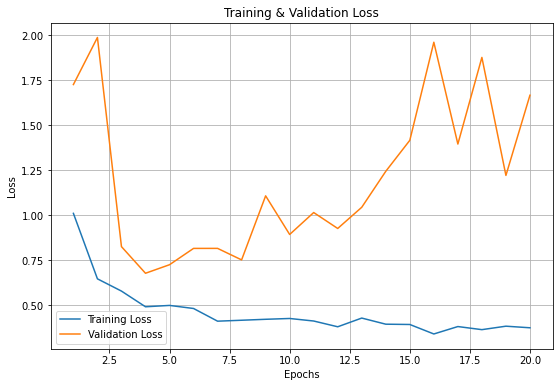

In [33]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_wafer.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_wafer.history['loss'])
plt.plot(epochs, Hist_wafer.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

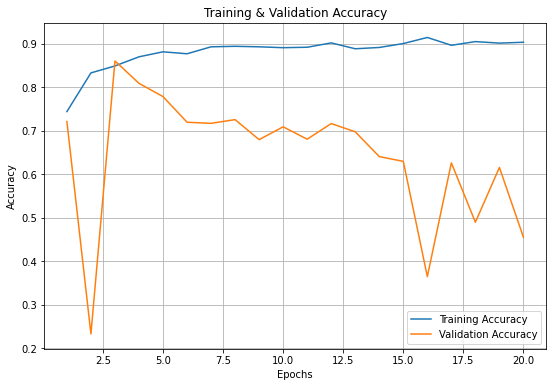

In [34]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_wafer.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_wafer.history['accuracy'])
plt.plot(epochs, Hist_wafer.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

# 
# 
# 
# The End
# 
# 
# 